In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Project5_Ag_Crop and weed detection.zip to Project5_Ag_Crop and weed detection (1).zip


In [ ]:
import os
# ensure folder exists
os.makedirs("/content/agri_project", exist_ok=True)

# Show what was uploaded in /content
print("Files in /content:")
!ls -la /content | sed -n '1,120p'


Files in /content:
total 163380
drwxr-xr-x 1 root root     4096 Nov  9 21:58 .
drwxr-xr-x 1 root root     4096 Nov  9 20:57 ..
drwxr-xr-x 4 root root     4096 Nov  9 21:16 agri_project
drwxr-xr-x 4 root root     4096 Nov  5 14:33 .config
drwxr-xr-x 2 root root     4096 Nov  9 21:18 Project5_Ag_Crop and weed detection
-rw-r--r-- 1 root root 83634945 Nov  9 21:58 Project5_Ag_Crop and weed detection (1).zip
-rw-r--r-- 1 root root 83634945 Nov  9 21:05 Project5_Ag_Crop and weed detection.zip
drwxr-xr-x 3 root root     4096 Nov  9 21:18 project_files
drwxr-xr-x 1 root root     4096 Nov  5 14:33 sample_data


In [ ]:
import zipfile, os

zip_path = "/content/Project5_Ag_Crop and weed detection.zip"  # <- replace if your uploaded name is different
extract_path = "/content/agri_project"
if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as z:
        z.extractall(extract_path)
    print("✅ Extracted to", extract_path)
else:
    print("❗ ZIP not found at", zip_path)


✅ Extracted to /content/agri_project


In [ ]:
import os
project_path = "/content/agri_project"
print("All files in project:")
for root, dirs, files in os.walk(project_path):
    for f in files:
        print(os.path.join(root, f))


All files in project:
/content/agri_project/project_files/classes.txt
/content/agri_project/project_files/agri_data/data/agri_0_3234.jpeg
/content/agri_project/project_files/agri_data/data/agri_0_1499.jpeg
/content/agri_project/project_files/agri_data/data/agri_0_3226.txt
/content/agri_project/project_files/agri_data/data/agri_0_9272.txt
/content/agri_project/project_files/agri_data/data/agri_0_3061.txt
/content/agri_project/project_files/agri_data/data/agri_0_6857.txt
/content/agri_project/project_files/agri_data/data/agri_0_8991.txt
/content/agri_project/project_files/agri_data/data/agri_0_741.jpeg
/content/agri_project/project_files/agri_data/data/agri_0_5435.jpeg
/content/agri_project/project_files/agri_data/data/agri_0_5128.txt
/content/agri_project/project_files/agri_data/data/agri_0_1123.txt
/content/agri_project/project_files/agri_data/data/agri_0_3556.jpeg
/content/agri_project/project_files/agri_data/data/agri_0_7989.txt
/content/agri_project/project_files/agri_data/data/agri

In [ ]:
# Inspect a file quickly. Replace with any .py or .txt from the list you saw.
file_to_view = "/content/agri_project/README.txt"  # <- REPLACE with a real file from Cell 4
if os.path.exists(file_to_view):
    !sed -n '1,200p' "{file_to_view}"
else:
    print("File not found:", file_to_view)


File not found: /content/agri_project/README.txt


In [ ]:
import os

# Dataset paths
base_path = "/content/agri_project/project_files/agri_data/data"
classes_path = "/content/agri_project/project_files/classes.txt"

print("✅ Dataset path set.")
print("Images + labels inside:", base_path)


✅ Dataset path set.
Images + labels inside: /content/agri_project/project_files/agri_data/data


In [ ]:
# Check what classes exist
with open(classes_path, "r") as f:
    classes = [line.strip() for line in f.readlines() if line.strip()]
print("Classes:", classes)


Classes: ['crop', 'weed']


In [ ]:
import glob

# List of all image files
image_files = sorted(glob.glob(os.path.join(base_path, "*.jpeg")))
label_files = sorted(glob.glob(os.path.join(base_path, "*.txt")))

print(f"Found {len(image_files)} images and {len(label_files)} labels")

# Preview a few
print("Sample image:", image_files[:3])
print("Sample label:", label_files[:3])


Found 1300 images and 1300 labels
Sample image: ['/content/agri_project/project_files/agri_data/data/agri_0_1009.jpeg', '/content/agri_project/project_files/agri_data/data/agri_0_1017.jpeg', '/content/agri_project/project_files/agri_data/data/agri_0_1018.jpeg']
Sample label: ['/content/agri_project/project_files/agri_data/data/agri_0_1009.txt', '/content/agri_project/project_files/agri_data/data/agri_0_1017.txt', '/content/agri_project/project_files/agri_data/data/agri_0_1018.txt']


In [ ]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

X, y = [], []

for img_path in image_files:
    label_path = img_path.replace(".jpeg", ".txt")
    if not os.path.exists(label_path):
        continue

    # Read image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))  # resize to fixed shape
    img = img / 255.0                  # normalize
    X.append(img)

    # Read label (first number in file)
    with open(label_path, "r") as f:
        label_line = f.readline().strip()
        if label_line: # Ensure the line is not empty
            class_id = int(label_line.split(" ")[0]) # Extract the first number as class ID
            y.append(class_id)

X = np.array(X)
y = np.array(y)

print("✅ Data prepared:", X.shape, y.shape)

✅ Data prepared: (1300, 128, 128, 3) (1300,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train size:", len(X_train), "Test size:", len(X_test))


Train size: 1040 Test size: 260


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # binary classification (crop vs weed)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 29s 809ms/step - accuracy: 0.5899 - loss: 0.9213 - val_accuracy: 0.6423 - val_loss: 0.5731
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 763ms/step - accuracy: 0.7874 - loss: 0.4867 - val_accuracy: 0.8538 - val_loss: 0.3810
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 778ms/step - accuracy: 0.8687 - loss: 0.3362 - val_accuracy: 0.8769 - val_loss: 0.4068
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 40s 742ms/step - accuracy: 0.8926 - loss: 0.3094 - val_accuracy: 0.8885 - val_loss: 0.3093
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 42s 783ms/step - accuracy: 0.8854 - loss: 0.2939 - val_accuracy: 0.9231 - val_loss: 0.2517
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 782ms/step - accuracy: 0.9272 - loss: 0.1943 - val_accuracy: 0.9038 - val_loss: 0.3411
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 792ms/step - accuracy: 0.9421 - loss: 0.1522 - val_accuracy: 0.9231 - val_loss: 0.2432
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 772ms/step - accuracy: 0.9618 - loss: 0.1262 - val_accu

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.9288 - loss: 0.2281
✅ Test Accuracy: 0.93


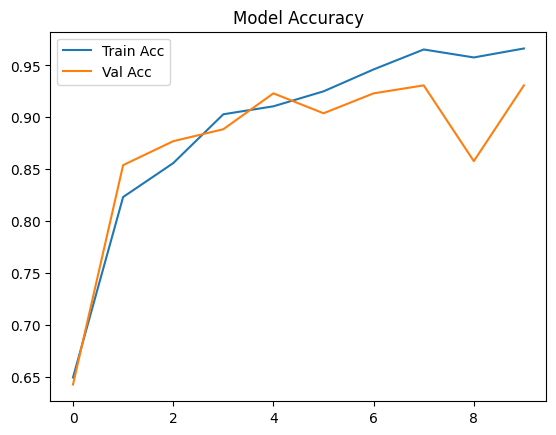

In [ ]:
import matplotlib.pyplot as plt

loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {acc:.2f}")

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.legend()
plt.show()


In [ ]:
model.save("/content/agri_project/crop_weed_model.h5")
print("✅ Model saved at /content/agri_project/crop_weed_model.h5")


✅ Model saved at /content/agri_project/crop_weed_model.h5


In [ ]:
from google.colab import files
files.download("/content/agri_project/crop_weed_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>